In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### EDA

In [2]:
df = pd.read_csv('data/Video_Games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Data cleaning

In [3]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [4]:
df = df.dropna(subset=['Publisher','Name','Year_of_Release'])
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [5]:
# replace NaN values
df['Developer'].fillna(df['Publisher'], inplace=True)
df['Critic_Count'].fillna(df['Critic_Count'].mean(),inplace=True)
df['Critic_Score'].fillna(df['Critic_Score'].mean(),inplace=True)
df['User_Count'].fillna(df['User_Count'].mean(),inplace=True)
# df['User_Score'].fillna(df['User_Score'].mean(),inplace=True)
# df['Rating'].fillna(df['Rating'].mean(),inplace=True)
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6579
User_Count            0
Developer             0
Rating             6649
dtype: int64

In [6]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['User_Score'].fillna(df['User_Score'].mean(),inplace=True)
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer             0
Rating             6649
dtype: int64

In [7]:
# I replaced the NaN value of Rating with its mode
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

## Genre Analysis

### Analysis of game genre distribution

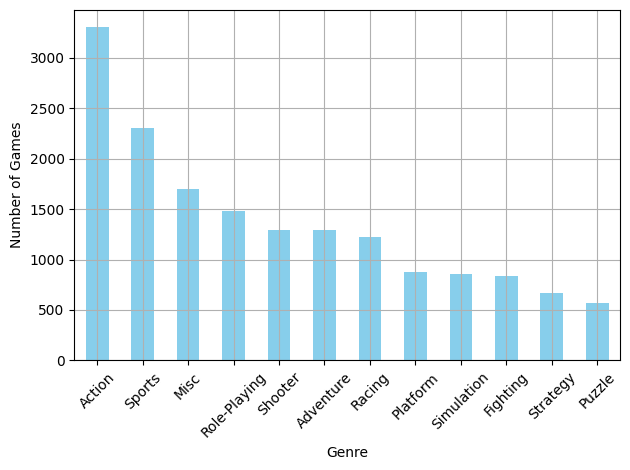

In [8]:
df['Genre'].value_counts().plot(kind='bar',color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Total Global sales for each genre

<AxesSubplot: ylabel='Global_Sales'>

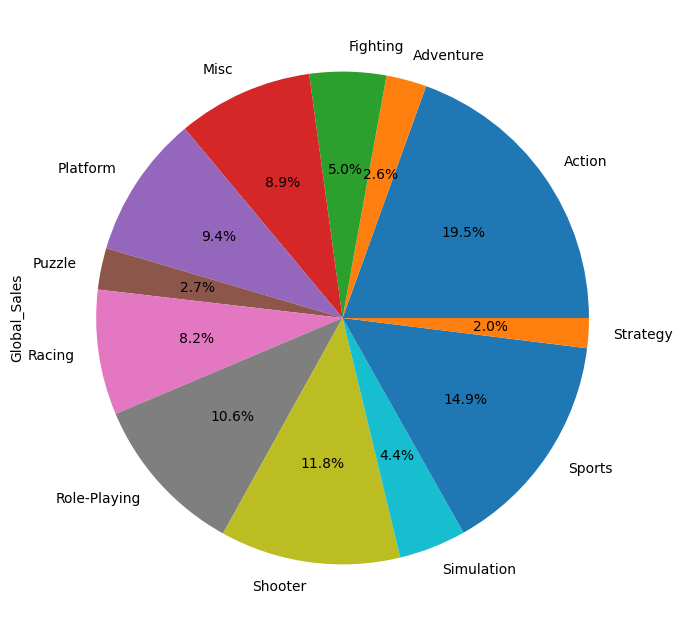

In [9]:
plt.figure(figsize=(10,8))
df.groupby('Genre')['Global_Sales'].sum().plot(kind='pie',autopct='%1.1f%%',)


## Platform analysis

### Analysis of games on different platforms

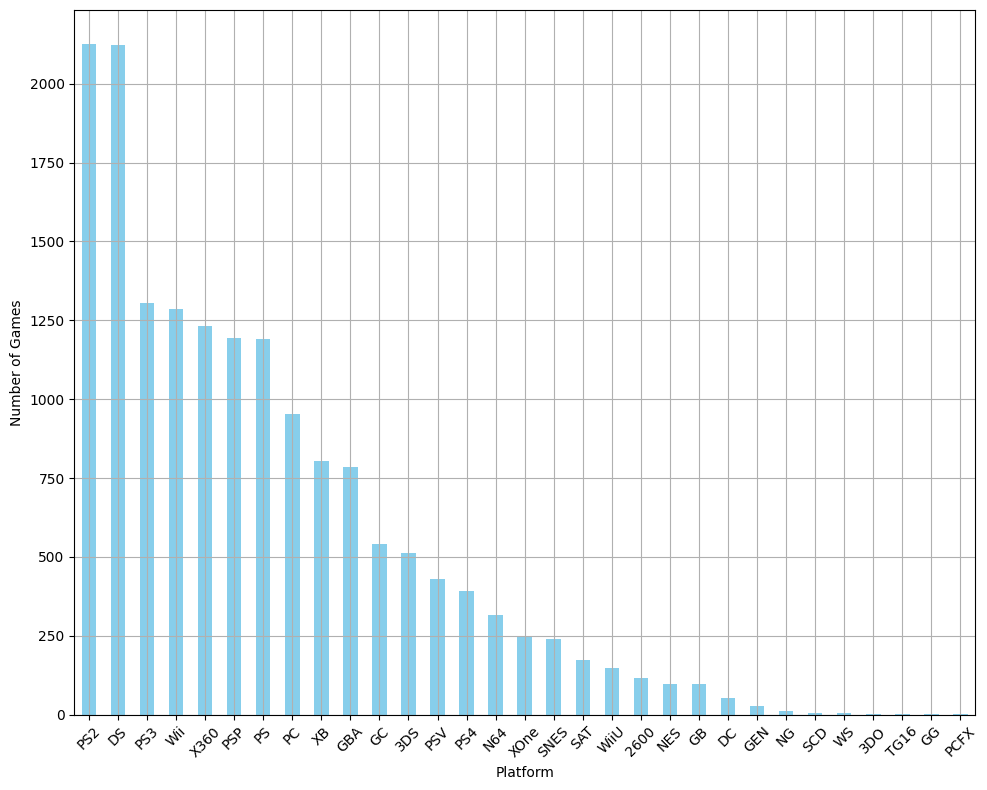

In [10]:
df['Platform'].value_counts().plot(kind='bar',color='skyblue',figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.grid(True)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

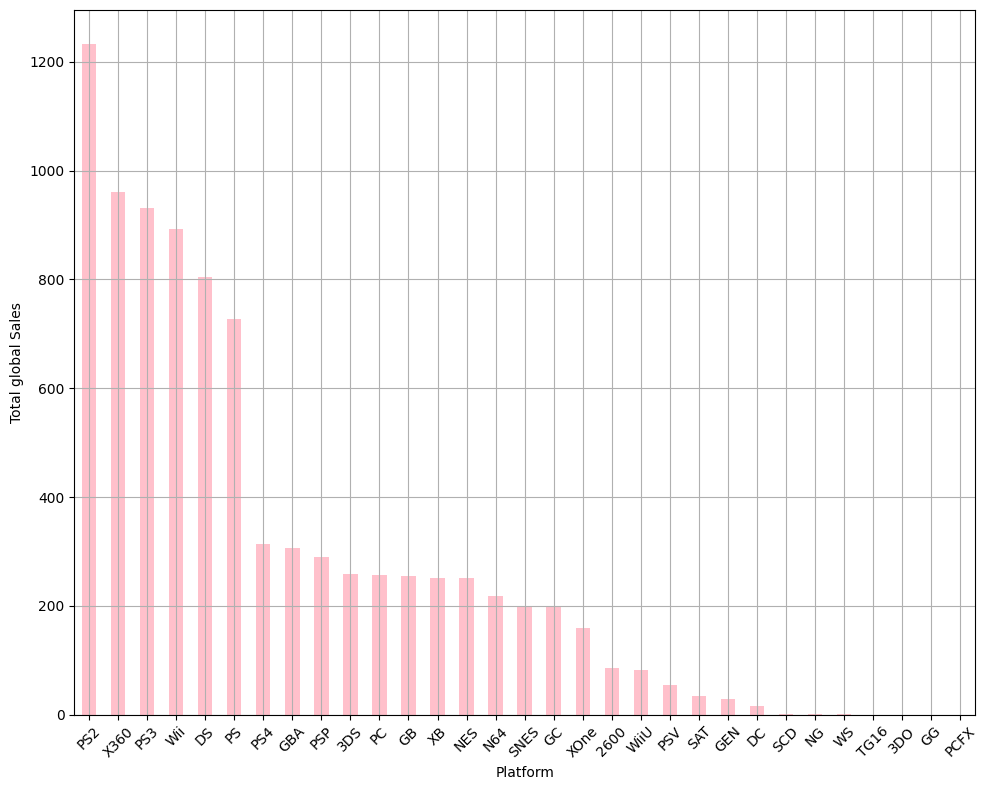

In [11]:
# platform_sales = 
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,8),color='pink')
plt.xticks(rotation=45)
plt.xlabel('Platform')
plt.ylabel('Total global Sales')
plt.grid(True)
plt.tight_layout()
plt.show

## Publisher analysis

### Analysis of distribution of games based on publisher

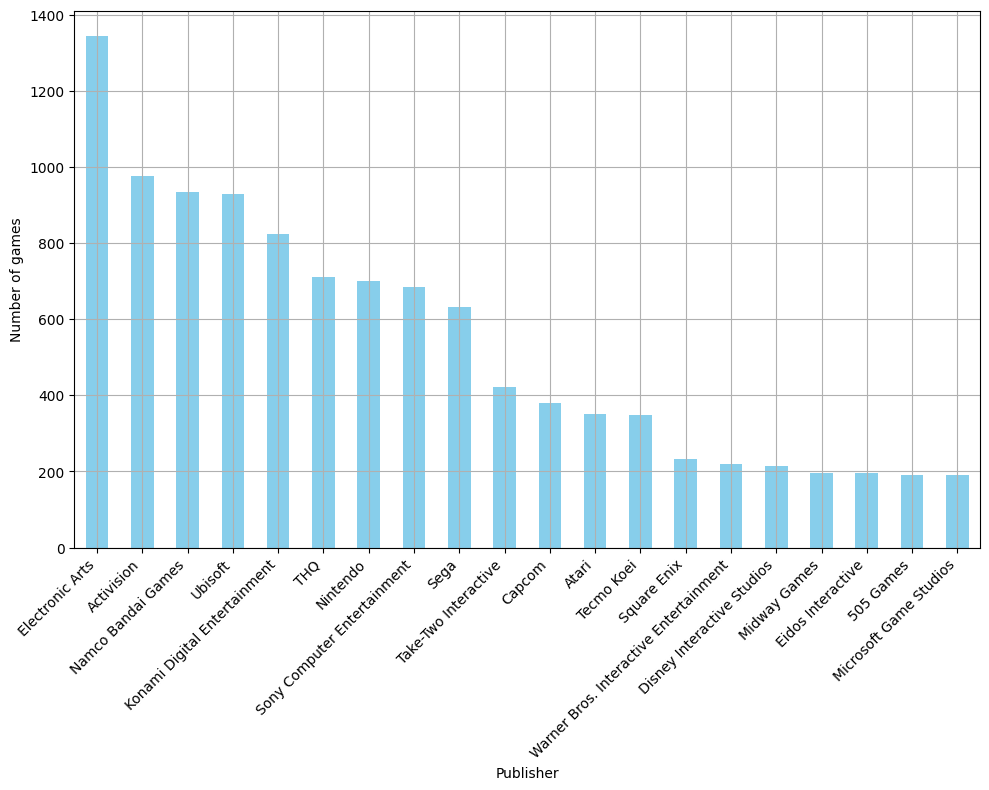

In [12]:
df['Publisher'].value_counts().head(20).plot(kind='bar',color='skyblue',figsize=(10,8))
plt.xticks(rotation=45,ha='right')
plt.xlabel('Publisher')
plt.ylabel('Number of games')
plt.grid(True)
plt.tight_layout()
plt.show()

### Total global sales for each publisher

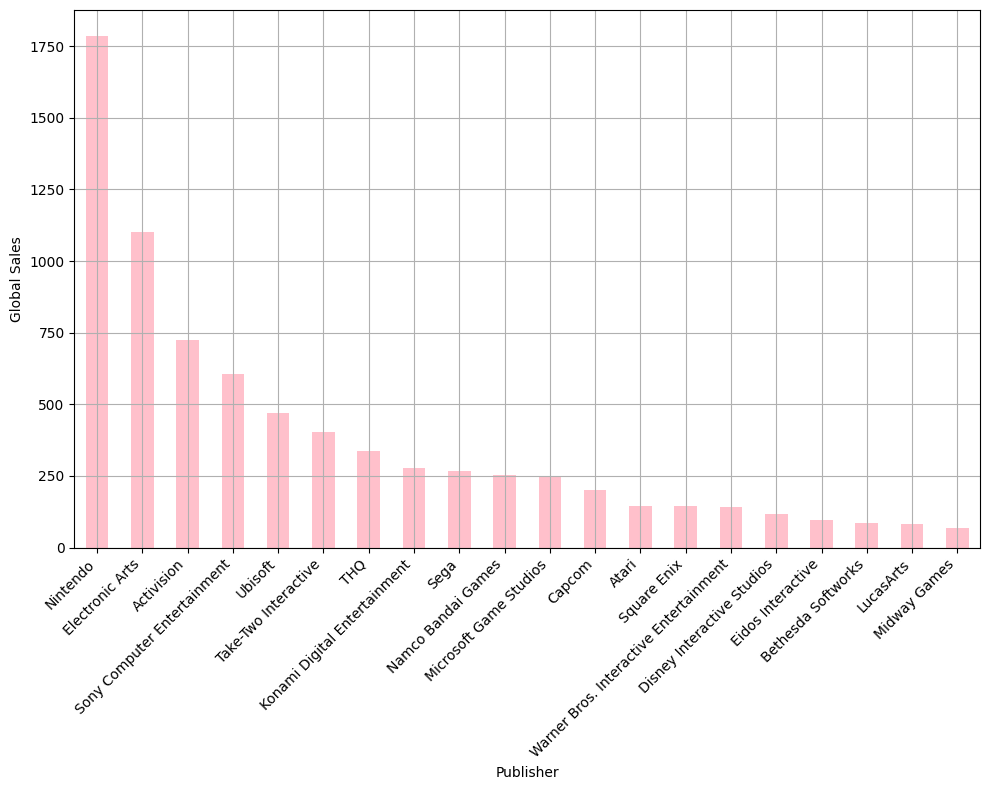

In [13]:
df.groupby(by='Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20).plot(kind='bar',color='pink',figsize=(10,8))
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Yearly analysis

### Number of games releases per year

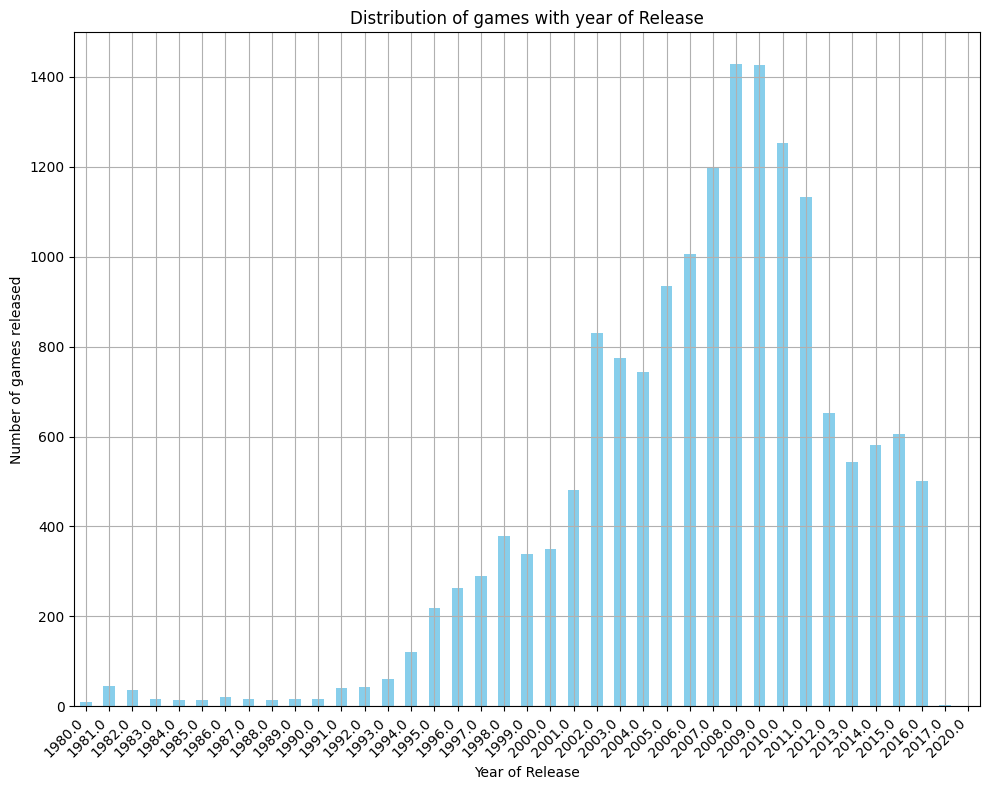

In [14]:
# df['Year_of_Release'] = df['Year_of_Release'].astype(str)
# df['Year_of_Release'] = df['Year_of_Release'].str.slice(stop=-2)
df.groupby('Year_of_Release')['Name'].count().plot(kind='bar',color='skyblue',figsize=(10,8))
plt.xlabel('Year of Release')
plt.ylabel('Number of games released')
plt.xticks(rotation=45,ha = 'right')
plt.title('Distribution of games with year of Release')
plt.grid(True)
plt.tight_layout()
plt.show()

### Global sales for each year

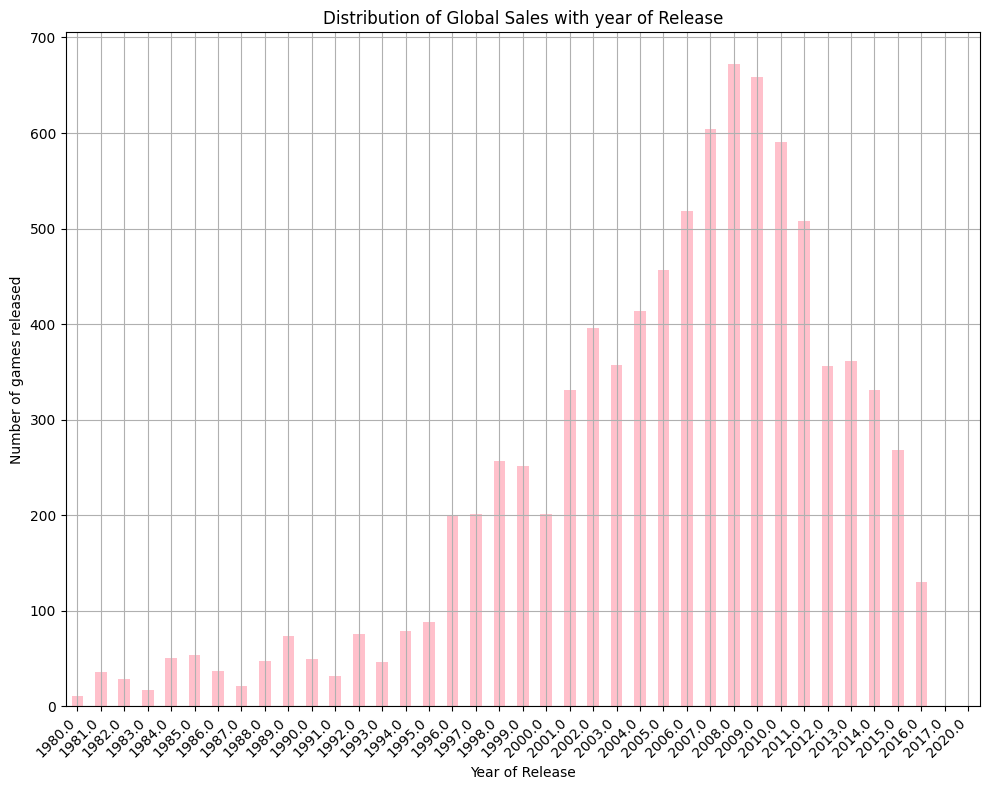

In [15]:
df.groupby('Year_of_Release')['Global_Sales'].sum().plot(kind='bar',color='pink',figsize=(10,8))
plt.xlabel('Year of Release')
plt.ylabel('Number of games released')
plt.xticks(rotation=45,ha = 'right')
plt.title('Distribution of Global Sales with year of Release')
plt.grid(True)
plt.tight_layout()
plt.show()

## Sales Analysis

### Distribution of sales in different regions

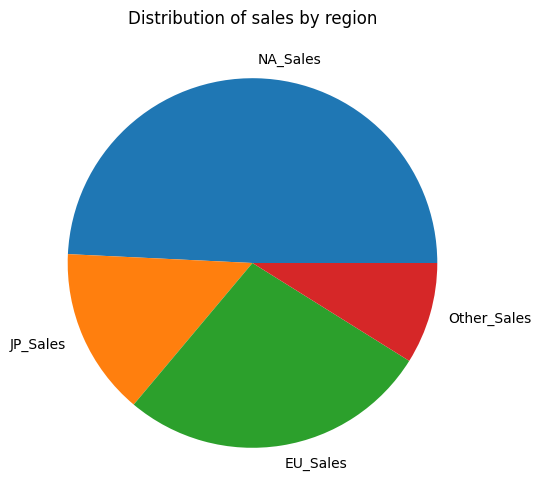

In [16]:
sales = df[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']].sum()
sales.plot(kind='pie',figsize=(8,6))
plt.title('Distribution of sales by region')
plt.show()

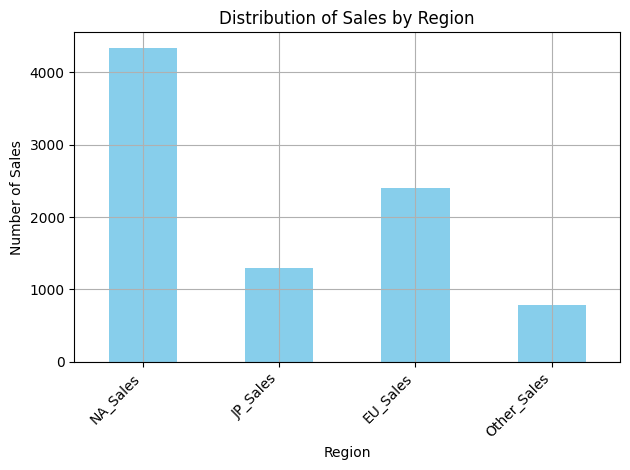

In [17]:
sales.plot(kind='bar',color='skyblue')
plt.title('Distribution of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45,ha  = 'right')
plt.tight_layout()
plt.grid(True)
plt.show()

### Correlation between critc scores, user scores and global sales

Text(0.5, 1.0, 'Correlation Heatmap: Critic/User Scores vs. Global Sales')

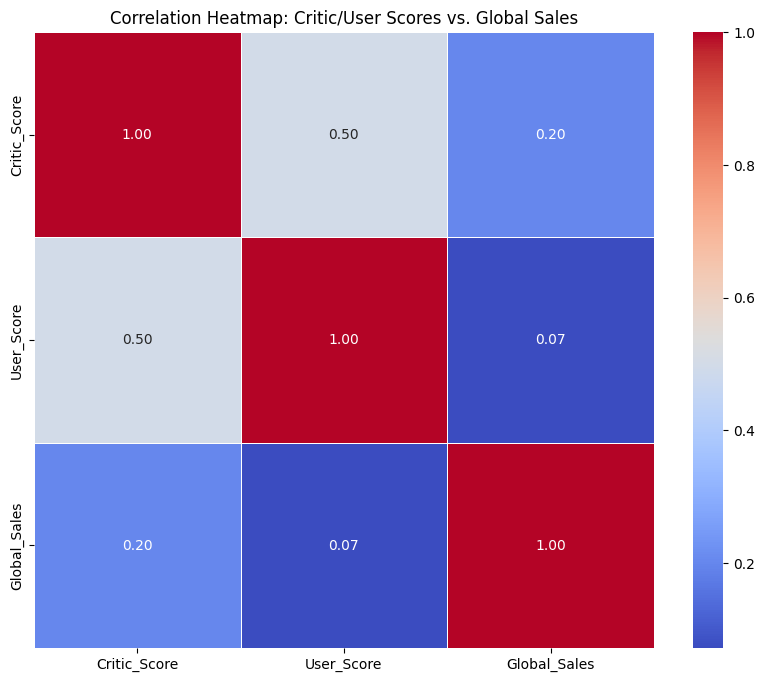

In [18]:
selected_columns = ['Critic_Score', 'User_Score', 'Global_Sales']
scores_and_sales = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = scores_and_sales.corr()
correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Critic/User Scores vs. Global Sales')

## Developer Analysis

### Distribution of games based on developers

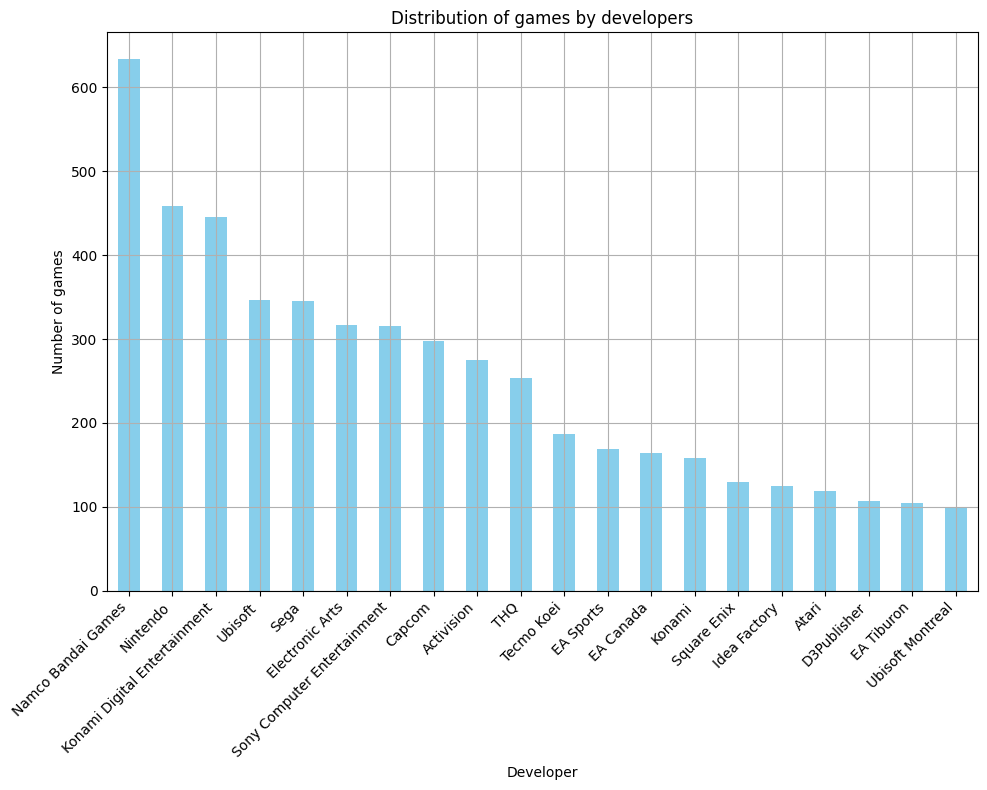

In [19]:
df['Developer'].value_counts().head(20).plot(kind='bar',color='skyblue',figsize=(10,8))
plt.title('Distribution of games by developers')
plt.xlabel('Developer')
plt.ylabel('Number of games')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Total Global Sales for each developer

In [20]:
total_sales_by_Developer = df['Developer'].value_counts()
total_sales_by_Developer

Developer
Namco Bandai Games              634
Nintendo                        459
Konami Digital Entertainment    446
Ubisoft                         346
Sega                            345
                               ... 
Entersphere, Inc.                 1
Contraband Entertainment          1
Infinite Machine                  1
SCE Japan Studio, comcept         1
Atomic Games                      1
Name: count, Length: 1979, dtype: int64

## Critic Score vs. User Score

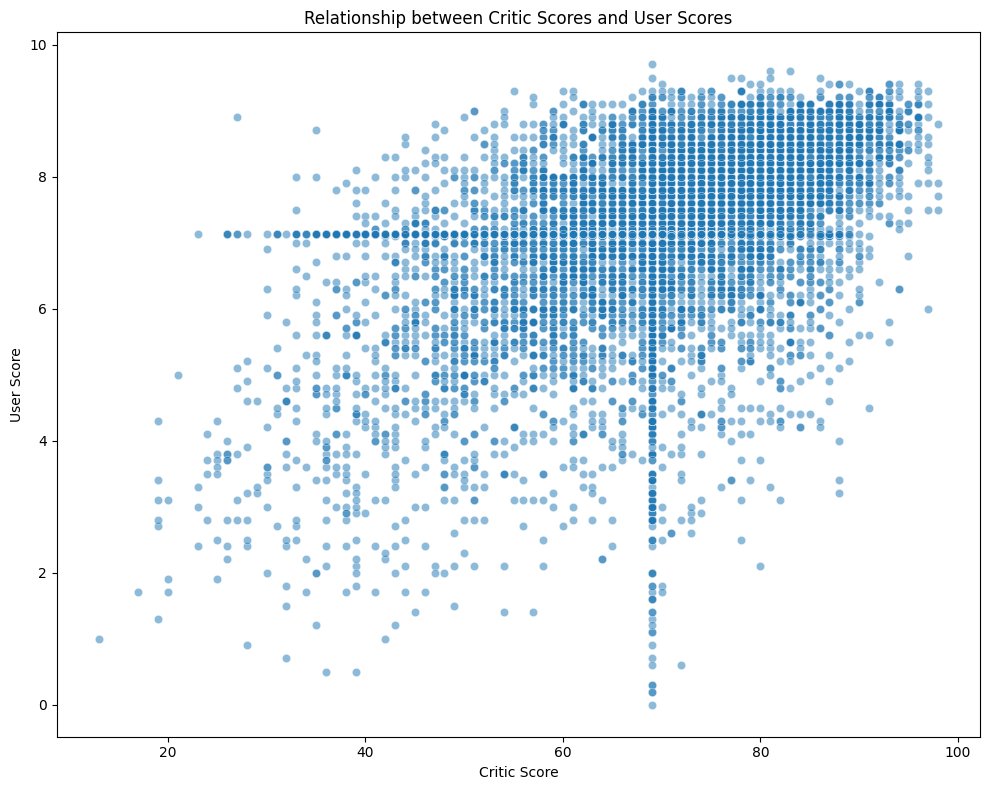

In [21]:

selected_columns = ['Critic_Score', 'User_Score']
scores_relation = df[selected_columns]


plt.figure(figsize=(10, 8))
sns.scatterplot(x='Critic_Score', y='User_Score', data=scores_relation, alpha=0.5)
plt.title('Relationship between Critic Scores and User Scores')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.tight_layout()
plt.show()


## User count vs Global Sales

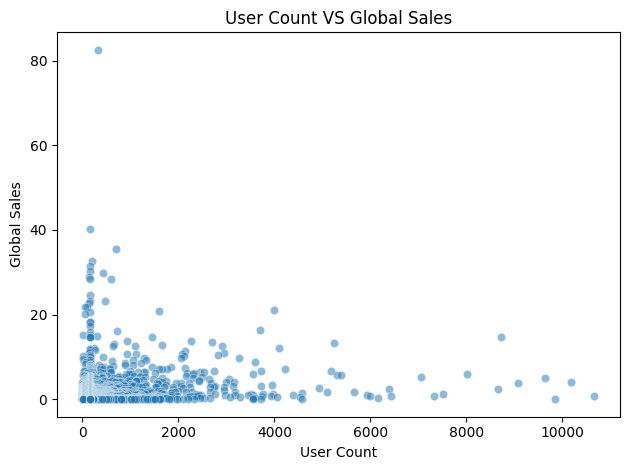

In [22]:
sns.scatterplot(x = 'User_Count', y = 'Global_Sales', data = df[['User_Count', 'Global_Sales']], alpha = 0.5)
plt.title('User Count VS Global Sales')
plt.xlabel('User Count')
plt.ylabel('Global Sales')
plt.tight_layout()
plt.show()



## Age and Ratings analysis

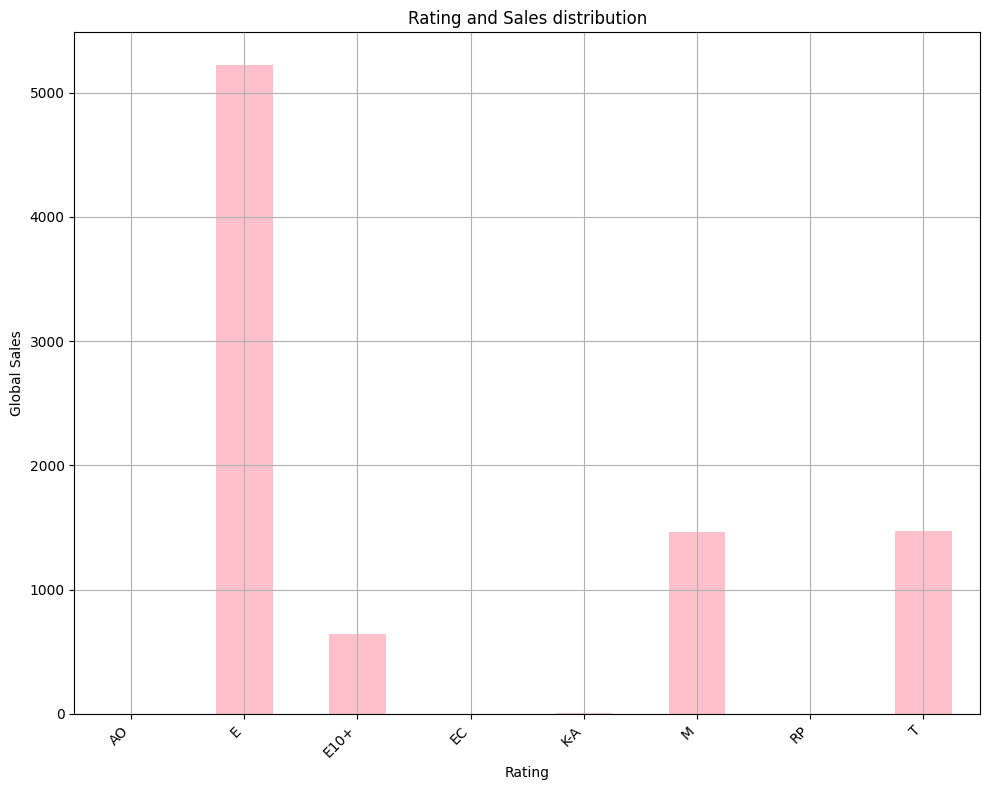

In [26]:
df.groupby('Rating')['Global_Sales'].sum().plot(kind = 'bar', figsize=(10,8),color = 'pink')
plt.title('Rating and Sales distribution')
plt.xlabel('Rating')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Global Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

## Market share analysis

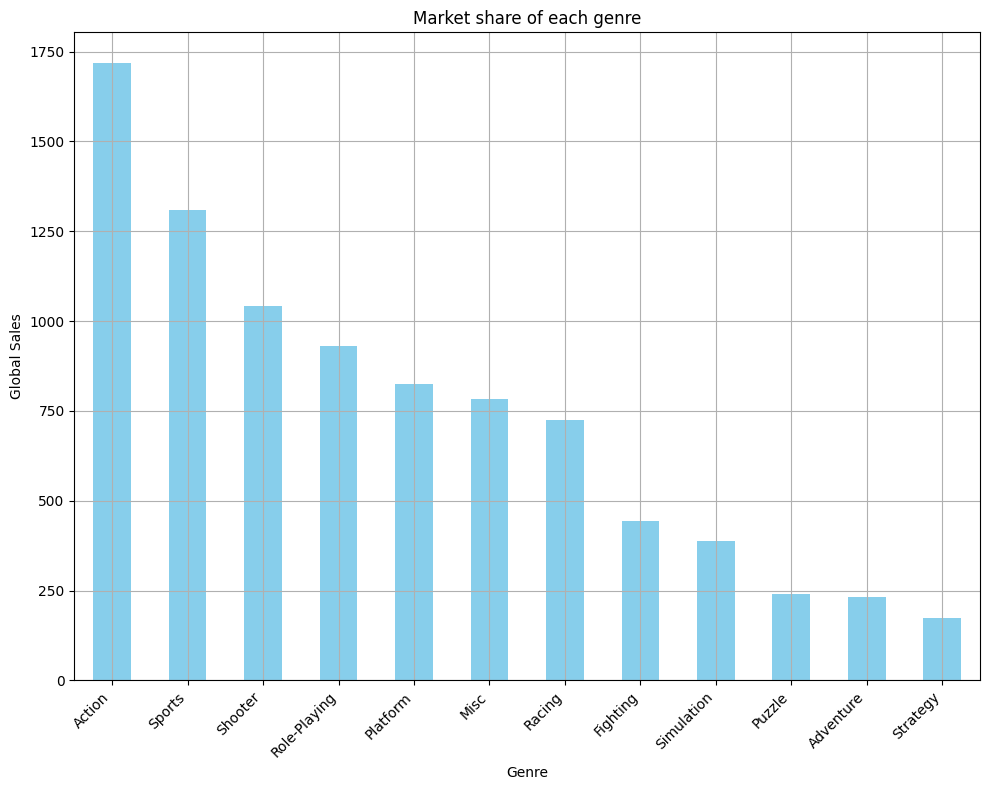

In [29]:
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize=(10,8),color = 'skyblue')
plt.title('Market share of each genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(True)
plt.tight_layout()
plt.show()

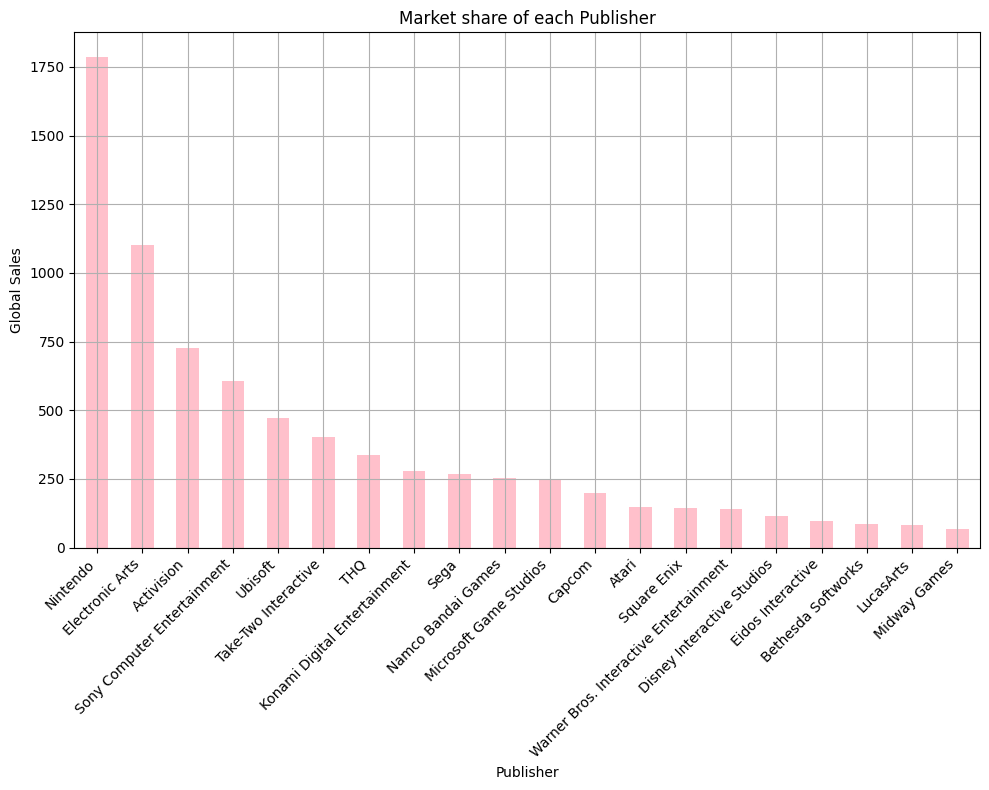

In [32]:
# by publisher
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20).plot(kind = 'bar', figsize=(10,8),color = 'pink')
plt.title('Market share of each Publisher')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(True)
plt.tight_layout()
plt.show()


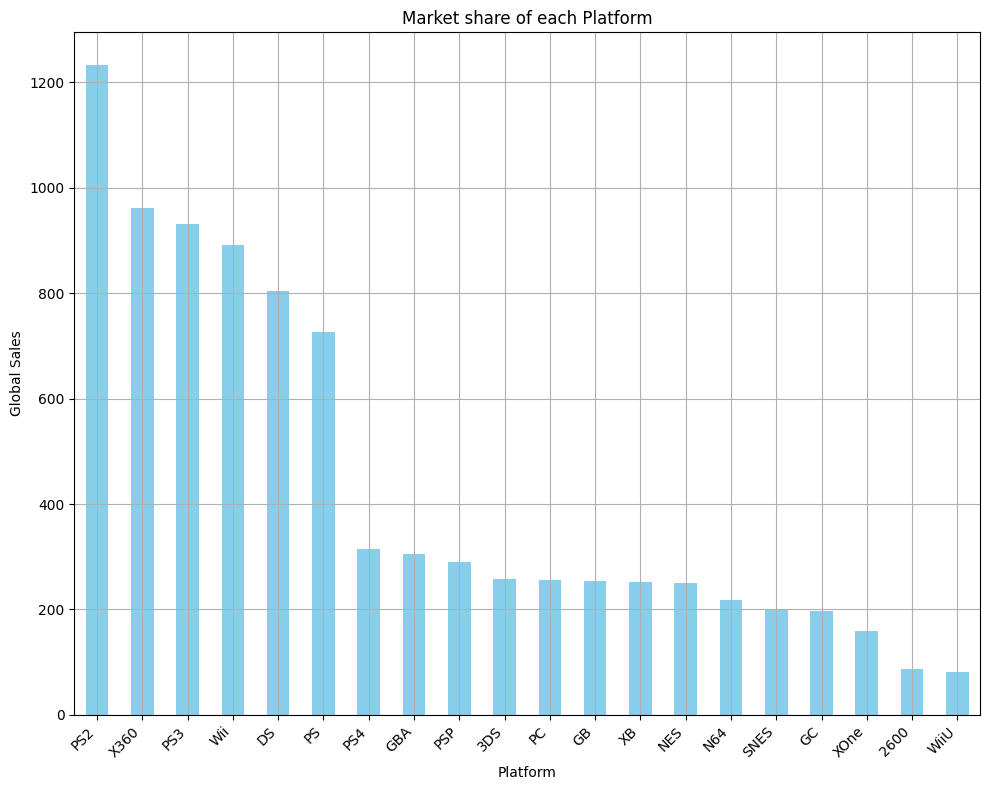

In [33]:
# by platform
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(20).plot(kind = 'bar', figsize=(10,8),color = 'skyblue')
plt.title('Market share of each Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(True)
plt.tight_layout()
plt.show()